# MCMC Sampling

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set_style('white')
sns.set_context('talk')

np.random.seed(123)
%matplotlib inline

In [4]:
data = np.random.randn(20)

/Users/rdilip/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


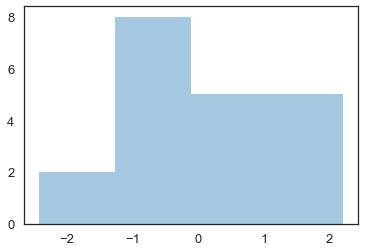

In [6]:
sns.distplot(data, kde=False)